In [2]:
import numpy as np
import time
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 8, 6

In [4]:
x_train = np.load('./data/x_train.npy')
y_train = np.load('./data/y_train.npy')
x_test = np.load('./data/x_test.npy')
y_test = np.load('./data/y_test.npy')
x_val = np.load('./data/x_val.npy')
y_val = np.load('./data/y_val.npy')

x = np.vstack((x_train, x_test))
y = np.concatenate((y_train, y_test))

In [5]:
from lbp import LBP

start = time.time()

lbp = LBP(500, 8)

features = []

for img in x:
    features.append(lbp.compute(img))

features = np.array(features)
print(f'Time => {time.time() - start}')

Time => 785.9655818939209


In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
print('Train shape: ', x_train.shape, y_train.shape)
print('Test shape: ', x_test.shape, y_test.shape)

Train shape:  (4672, 502) (4672,)
Test shape:  (1168, 502) (1168,)


In [15]:
start = time.time()

model = SVC(kernel='linear', probability=True) 
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
print('Validation accuracy: ', accuracy_score(y_test, y_test_pred))
print(f'Training time {time.time() - start}')

Train accuracy:  0.7326626712328768
Validation accuracy:  0.7208904109589042
Training time 61.044461488723755


In [16]:
real = []
pred = []
for img, label in zip(x_val, y_val):
    feature_vector = lbp.compute(img)
    prediction = model.predict(feature_vector.reshape(1, -1))[0]
    real.append(label)
    pred.append(prediction)
    print(f'Real label: {label} ==> Predicted lables: {prediction}')

Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[  0 326]
 [  0 842]]


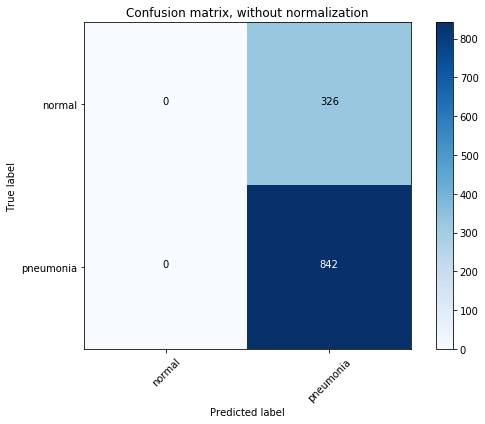

In [21]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal', 'pneumonia'],
                      title='Confusion matrix, without normalization')

Na cm plotu se vidi da SVM model nije validan, za svaki ulaz se dobija ista predikcija.

In [23]:
start = time.time()

from xgboost import XGBClassifier
model = XGBClassifier(max_depth=1000, objective='binary:logistic', seed=42) 
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
print('Validation accuracy: ', accuracy_score(y_test, y_test_pred))
print(f'Training time {time.time() - start}')

Train accuracy:  1.0
Validation accuracy:  0.8690068493150684
Training time 27.5022292137146


In [24]:
real = []
pred = []
for img, label in zip(x_val, y_val):
    feature_vector = lbp.compute(img)
    prediction = model.predict(feature_vector.reshape(1, -1))[0]
    real.append(label)
    pred.append(prediction)
    print(f'Real label: {label} ==> Predicted lables: {prediction}')

Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 1
Real label: 0 ==> Predicted lables: 0
Real label: 0 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 0
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1
Real label: 1 ==> Predicted lables: 1


Confusion matrix, without normalization
[[229  97]
 [ 56 786]]


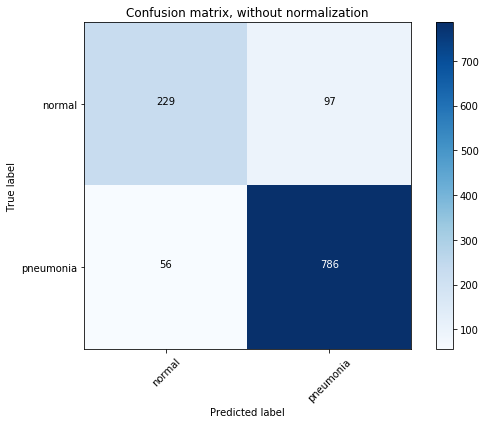

In [25]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal', 'pneumonia'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.7  0.3 ]
 [0.07 0.93]]


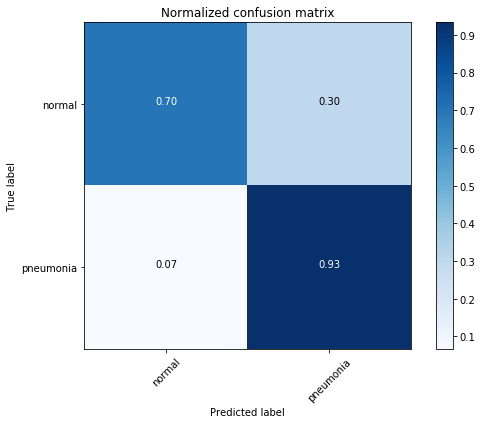

In [26]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal', 'pneumonia'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Na cm plotovima se vidi da je Gradient Boosting klasifikator mnogo bolji od SVM klasifikatora.
Na osnovu ovih rezultata i rezultata iz notebooka 2.HOG+SVM,
zakljucuje se da je konkretno u ovom slucaju HOG deskriptor bolji za feature extraction.
Pored ova dva algoritma, vredi pokusati i MLP neuronsku mrezu.

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def get_mlp(input_dim, dropout=False):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_dim,), activation='relu'))
    if dropout:
        model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    if dropout:
        model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model
    
def nn_plots(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [91]:
model = get_mlp(x.shape[1])
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Train on 4672 samples, validate on 1168 samples
Epoch 1/100
4672/4672 [==============================] - 4s 856us/step - loss: 0.5806 - acc: 0.7327 - val_loss: 0.5585 - val_acc: 0.7209
Epoch 2/100
4672/4672 [==============================] - 2s 473us/step - loss: 0.5052 - acc: 0.7327 - val_loss: 0.4635 - val_acc: 0.7209
Epoch 3/100
4672/4672 [==============================] - 2s 501us/step - loss: 0.4490 - acc: 0.7457 - val_loss: 0.4251 - val_acc: 0.8039
Epoch 4/100
4672/4672 [==============================] - 2s 465us/step - loss: 0.4021 - acc: 0.8027 - val_loss: 0.4289 - val_acc: 0.7842
Epoch 5/100
4672/4672 [==============================] - 2s 480us/step - loss: 0.3960 - acc: 0.8035 - val_loss: 0.3992 - val_acc: 0.8134
Epoch 6/100
4672/4672 [==============================] - 2s 458us/step - loss: 0.3915 - acc: 0.8084 - val_loss: 0.3755 - val_acc: 0.8296
Epoch 7/100
4672/4672 [==============================] - 3s 544us/step - loss: 0.3694 - acc: 0.8204 - val_loss: 0.3782 - val_acc: 

4672/4672 [==============================] - 4s 858us/step - loss: 0.2432 - acc: 0.8958 - val_loss: 0.3136 - val_acc: 0.8707
Epoch 61/100
4672/4672 [==============================] - 2s 431us/step - loss: 0.2477 - acc: 0.8908 - val_loss: 0.3138 - val_acc: 0.8622
Epoch 62/100
4672/4672 [==============================] - 2s 477us/step - loss: 0.2551 - acc: 0.8926 - val_loss: 0.2794 - val_acc: 0.8767
Epoch 63/100
4672/4672 [==============================] - 2s 412us/step - loss: 0.2426 - acc: 0.8985 - val_loss: 0.2827 - val_acc: 0.8750
Epoch 64/100
4672/4672 [==============================] - 2s 364us/step - loss: 0.2502 - acc: 0.8898 - val_loss: 0.3128 - val_acc: 0.8579
Epoch 65/100
4672/4672 [==============================] - 2s 417us/step - loss: 0.2522 - acc: 0.8893 - val_loss: 0.2797 - val_acc: 0.8699
Epoch 66/100
4672/4672 [==============================] - 2s 324us/step - loss: 0.2355 - acc: 0.9022 - val_loss: 0.2982 - val_acc: 0.8630
Epoch 67/100
4672/4672 [=======================

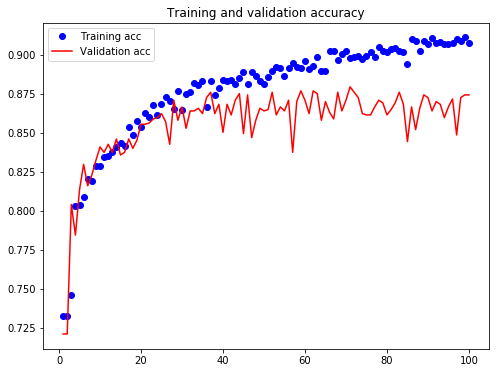

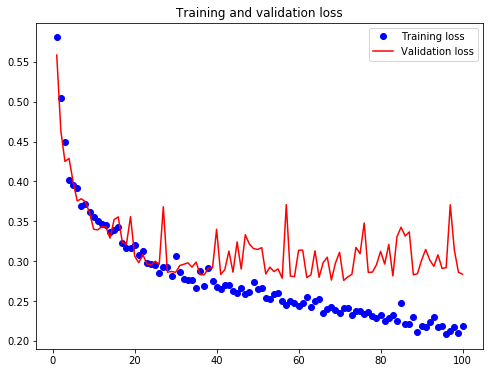

In [92]:
nn_plots(history)

In [93]:
model = get_mlp(x.shape[1], dropout=True)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Train on 4672 samples, validate on 1168 samples
Epoch 1/100
4672/4672 [==============================] - 5s 1ms/step - loss: 0.5998 - acc: 0.7256 - val_loss: 0.5751 - val_acc: 0.7209
Epoch 2/100
4672/4672 [==============================] - 3s 679us/step - loss: 0.5450 - acc: 0.7327 - val_loss: 0.4884 - val_acc: 0.7209
Epoch 3/100
4672/4672 [==============================] - 3s 548us/step - loss: 0.4795 - acc: 0.7327 - val_loss: 0.4524 - val_acc: 0.7209
Epoch 4/100
4672/4672 [==============================] - 2s 504us/step - loss: 0.4633 - acc: 0.7327 - val_loss: 0.4305 - val_acc: 0.7209
Epoch 5/100
4672/4672 [==============================] - 3s 690us/step - loss: 0.4261 - acc: 0.7748 - val_loss: 0.3928 - val_acc: 0.8271
Epoch 6/100
4672/4672 [==============================] - 3s 595us/step - loss: 0.4148 - acc: 0.7907 - val_loss: 0.3996 - val_acc: 0.8031
Epoch 7/100
4672/4672 [==============================] - 2s 531us/step - loss: 0.3994 - acc: 0.8039 - val_loss: 0.3920 - val_acc: 0.

4672/4672 [==============================] - 2s 418us/step - loss: 0.2916 - acc: 0.8716 - val_loss: 0.2962 - val_acc: 0.8587
Epoch 61/100
4672/4672 [==============================] - 2s 433us/step - loss: 0.2984 - acc: 0.8709 - val_loss: 0.2939 - val_acc: 0.8630
Epoch 62/100
4672/4672 [==============================] - 2s 437us/step - loss: 0.3009 - acc: 0.8677 - val_loss: 0.3116 - val_acc: 0.8613
Epoch 63/100
4672/4672 [==============================] - 3s 734us/step - loss: 0.2984 - acc: 0.8647 - val_loss: 0.2935 - val_acc: 0.8596
Epoch 64/100
4672/4672 [==============================] - 4s 961us/step - loss: 0.2936 - acc: 0.8731 - val_loss: 0.2841 - val_acc: 0.8699
Epoch 65/100
4672/4672 [==============================] - 4s 830us/step - loss: 0.2878 - acc: 0.8748 - val_loss: 0.2873 - val_acc: 0.8690
Epoch 66/100
4672/4672 [==============================] - 3s 573us/step - loss: 0.2941 - acc: 0.8711 - val_loss: 0.2962 - val_acc: 0.8647
Epoch 67/100
4672/4672 [=======================

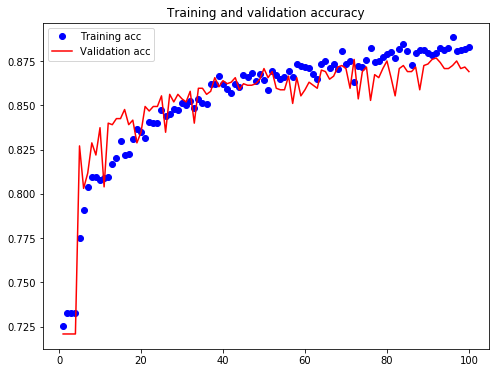

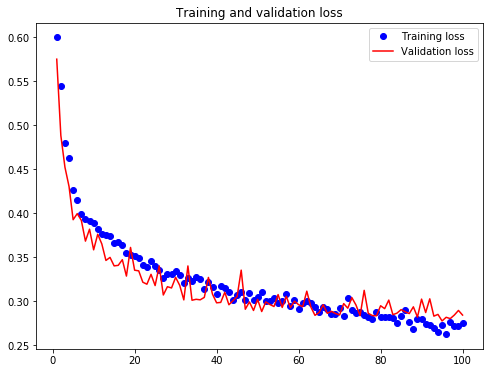

In [94]:
nn_plots(history)

In [139]:
x_test = np.load('./data/x_test.npy')
y_test = np.load('./data/y_test.npy')

In [140]:
y_test_pred = []
for img in x_test:
    feature_vector = lbp.compute(img)
    prediction = model.predict_classes(feature_vector.reshape(1, -1))
    y_test_pred.append(prediction)

In [154]:
y_tp = []
for i in range(len(y_test_pred)):
    y_tp.append(y_test_pred[i][0][0])

Confusion matrix, without normalization
[[113 121]
 [ 11 379]]


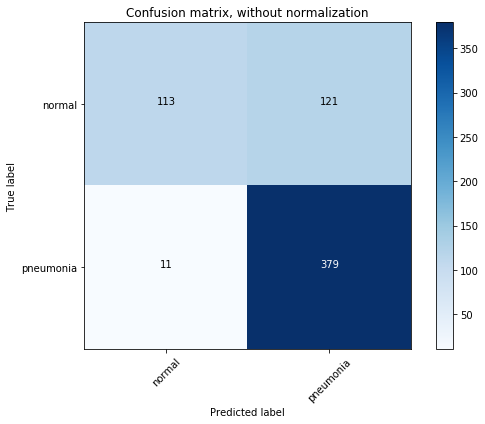

In [156]:
cnf_matrix = confusion_matrix(y_test, y_tp)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal', 'pneumonia'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.48 0.52]
 [0.03 0.97]]


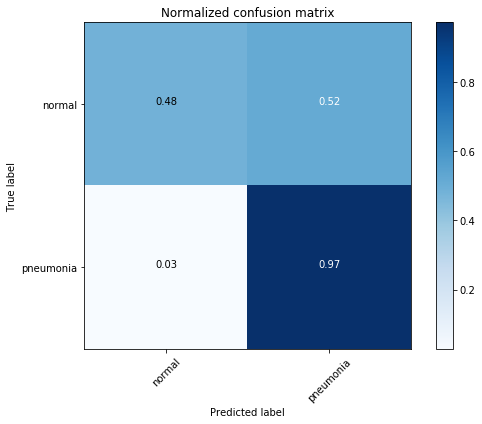

In [157]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['normal', 'pneumonia'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

MLP pogresno klasifikuje skoro pola normalnih snimaka, dok snimke na kojima je prisutna pneumonia klasifikuje bolje od predhodnih modela.